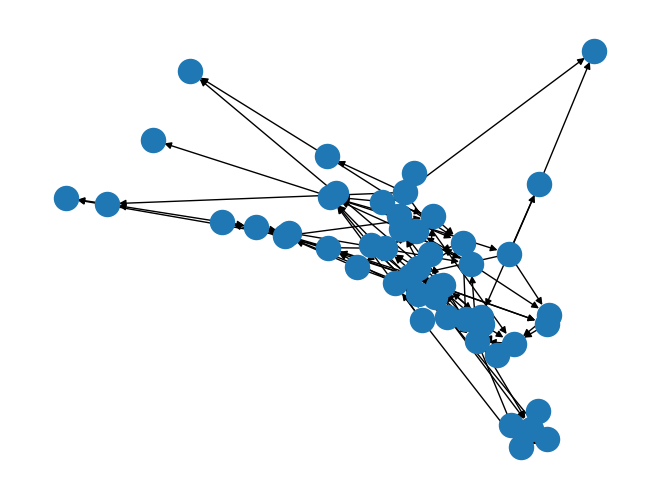

In [22]:
import networkx as nx
import random

n = 50
n_transfers = 100

G = nx.DiGraph()

G.add_nodes_from(range(n))

for i in range(n_transfers):
    transfer = random.sample(list(G.nodes), k=2)
    G.add_edge(transfer[0], transfer[1], weight=1)

nx.draw(G)

In [23]:
def cycle_weight(cycle):
    return sum(G.edges[edge]['weight'] for edge in cycle)

def cycle_intersect(a, b):
    return len(set(a).intersection(set(b))) != 0

def get_cycles(G):
    pre = nx.recursive_simple_cycles(G)
    cycles = []
    for cycle in pre:
        cycles.append([(cycle[i], cycle[i + 1]) for i in range(len(cycle) - 1)])
    return cycles

In [26]:
import pulp

cycles = get_cycles(G)

prob = pulp.LpProblem('exchange', pulp.LpMaximize)

cycle_vars = pulp.LpVariable.dicts('cycle_vars', range(len(cycles)), cat=pulp.LpBinary)

prob += pulp.lpSum([cycle_vars[i] * cycle_weight(cycles[i]) for i in range(len(cycles))]), 'Objective'

for i in range(len(cycles) - 1):
    for j in range(i + 1, len(cycles)):
        if i != j and cycle_intersect(cycles[i], cycles[j]):
            prob += cycle_vars[i] + cycle_vars[j] == 1

prob.solve()

print(pulp.LpStatus[prob.status])

AttributeError: 'NoneType' object has no attribute 'actualSolve'